<a href="https://colab.research.google.com/github/ingefull-git/google_colab/blob/main/Finance_Analitics_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This python program for finance, will show you how to compute portfolio simple returns, get daily returns and volatility...


In [ ]:
from datetime import datetime
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')


## Get the stock symbols for the portfolio (FAANG)

In [ ]:
stockSymbols = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

## Get the stock starting date

In [ ]:
stockStartDate = '2013-01-01'

## Get todays date and format it in the form YYYY-mm-dd

In [ ]:
today = datetime.today().strftime('%Y-%m-%d')
today

'2020-11-27'

## Get the numer of assets in the portfolio

In [ ]:
numAssets = len(stockSymbols)
print('You have ',numAssets,' assets in your portfolio')

You have  5  assets in your portfolio


## Create a function to get the stock prices in the portfolio

In [ ]:
def getMyPortfolio(stocks= stockSymbols, start= stockStartDate, end= today, col= 'Adj Close'):
  data = web.DataReader(stocks, data_source='yahoo', start=start, end=end)[col]
  return data
  

## Get the stock portfolio Adj. Close price

In [ ]:
my_stocks = getMyPortfolio(stockSymbols)
my_stocks

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,16.926661,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.713015,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.247477,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.151909,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.195379,13.880000,365.280823
...,...,...,...,...,...
2020-11-19,272.940002,3117.020020,118.639999,484.670013,1763.920044
2020-11-20,269.700012,3099.399902,117.339996,488.239990,1742.189941
2020-11-23,268.429993,3098.389893,113.849998,476.619995,1734.859985


## Visualize the portfolio

In [ ]:
def showGraph(stocks= stockSymbols, start= stockStartDate, end= today, col= 'Adj Close'):
  title = 'Portfolio '+col+ ' Price History'
  my_stocks = getMyPortfolio(stocks= stocks, start=start, end=end, col=col)
  plt.figure(figsize=(12.2, 4.5))
  for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)
  plt.title(title)
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col+' Price USD ($)', fontsize=18)
  plt.legend(my_stocks.columns.values, loc='upper left')
  plt.show()


## Show the adjusted close price for FAANG

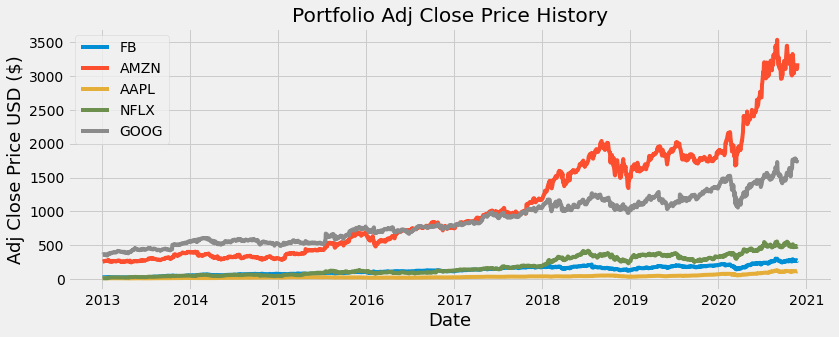

In [ ]:
showGraph(stockSymbols)

## Calculate the simple daily returns

In [ ]:
daily_simple_returns = my_stocks.pct_change(1)
daily_simple_returns

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002691,-0.020565,-0.001974
...,...,...,...,...,...
2020-11-19,0.003567,0.003722,0.005168,0.005978,0.009812
2020-11-20,-0.011871,-0.005653,-0.010958,0.007366,-0.012319
2020-11-23,-0.004709,-0.000326,-0.029743,-0.023800,-0.004207


## Show the stock correlation

In [ ]:
daily_simple_returns.corr()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,1.000000,0.520878,0.455212,0.357132,0.569393
AMZN,0.520878,1.000000,0.454603,0.449416,0.606754
AAPL,0.455212,0.454603,1.000000,0.267377,0.526726
NFLX,0.357132,0.449416,0.267377,1.000000,0.413027
GOOG,0.569393,0.606754,0.526726,0.413027,1.000000


## Show the covariance for simple returns

In [ ]:
daily_simple_returns.cov()

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Symbols,,,,,
FB,0.000474,0.000220,0.000179,0.000226,0.000201
AMZN,0.000220,0.000376,0.000159,0.000253,0.000191
AAPL,0.000179,0.000159,0.000325,0.000140,0.000154
NFLX,0.000226,0.000253,0.000140,0.000843,0.000195
GOOG,0.000201,0.000191,0.000154,0.000195,0.000263


## Show the variance

In [ ]:
daily_simple_returns.var()

Symbols
FB      0.000474
AMZN    0.000376
AAPL    0.000325
NFLX    0.000843
GOOG    0.000263
dtype: float64

## Show the standard deviation for daily simple return

In [ ]:
print('The Stock Volatility:')
daily_simple_returns.std()

The Stock Volatility:


Symbols
FB      0.021779
AMZN    0.019399
AAPL    0.018022
NFLX    0.029030
GOOG    0.016231
dtype: float64

## Visualize the stock daily simple returns

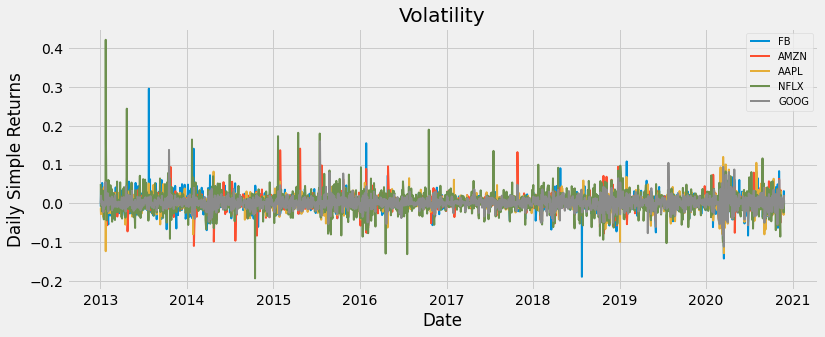

In [ ]:
plt.figure(figsize=(12, 4.5))
for c in daily_simple_returns.columns.values:
  plt.plot(daily_simple_returns.index, daily_simple_returns[c], lw=2, label=c)
plt.legend(loc='upper right', fontsize=10)
plt.title('Volatility')
plt.ylabel('Daily Simple Returns')
plt.xlabel('Date')
plt.show()


## Show the mean of the daily simple return

In [ ]:
dailyMeanSimpleReturns = daily_simple_returns.mean()
print('The daily mean simple return:')
dailyMeanSimpleReturns


The daily mean simple return:


Symbols
FB      0.001384
AMZN    0.001452
AAPL    0.001131
NFLX    0.002222
GOOG    0.000931
dtype: float64

## Calculate the expected portfolio daily return

In [ ]:
randomWeights = np.array([0.4, 0.1, 0.3, 0.1, 0.1])  # 40% FB, 10% AMZN, 30% AAPL, 10% NFLX, 10% GOOG
portfolioSimpleReturn = np.sum(dailyMeanSimpleReturns * randomWeights)
print('The daily expected portfolio return: '+str(portfolioSimpleReturn))


The daily expected portfolio return: 0.0013532495809377232


## Get the yearly simple return

In [ ]:
print("Expected annualised portfolio simple return: "+ str(portfolioSimpleReturn * 253))


Expected annualised portfolio simple return: 0.34237214397724397


## Calculate the growth of the investment

In [ ]:
dailyCumulSimplReturn = (daily_simple_returns+1).cumprod()
dailyCumulSimplReturn

Symbols,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,0.991786,1.004547,0.987378,1.049777,1.000581
2013-01-04,1.027143,1.007151,0.959875,1.043147,1.020353
2013-01-07,1.050714,1.043333,0.954229,1.078144,1.015900
2013-01-08,1.037857,1.035249,0.956797,1.055972,1.013896
...,...,...,...,...,...
2020-11-19,9.747857,12.113871,7.009061,36.873057,4.896043
2020-11-20,9.632143,12.045392,6.932259,37.144656,4.835728
2020-11-23,9.586785,12.041467,6.726076,36.260622,4.815382


## Visualize the daily cumulative simple returns

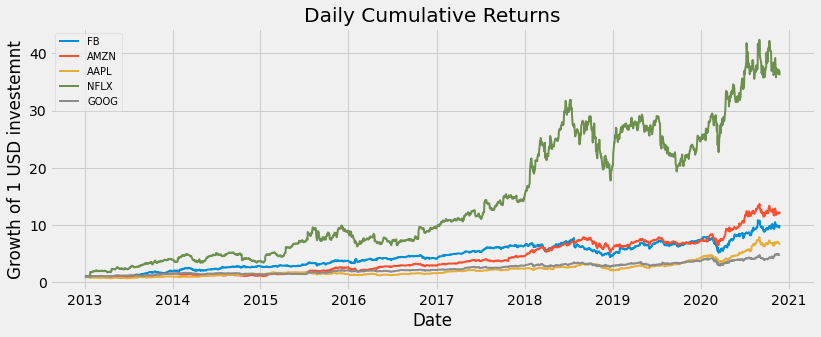

In [ ]:
plt.figure(figsize=(12.2, 4.5))
for c in dailyCumulSimplReturn.columns.values:
  plt.plot(dailyCumulSimplReturn.index, dailyCumulSimplReturn[c], lw=2, label=c)
plt.legend(loc='upper left', fontsize=10)
plt.title('Daily Cumulative Returns')
plt.ylabel('Growth of 1 USD investemnt')
plt.xlabel('Date')
plt.show()